<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product ">
</a> 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="200" alt="cognitiveclass.ai logo">


<h1><h1>Pre-trained-Models with PyTorch </h1>


In this lab, you will use pre-trained models to classify between the negative and positive samples; you will be provided with the dataset object. The particular pre-trained model will be resnet18; you will have three questions: 
<ul>
<li>change the output layer</li>
<li> train the model</li> 
<li>  identify  several  misclassified samples</li> 
 </ul>
You will take several screenshots of your work and share your notebook. 


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">


<ul>
    <li><a href="#download_data"> Download Data</a></li>
    <li><a href="#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="#data_class"> Dataset Class</a></li>
    <li><a href="#Question_1">Question 1</a></li>
    <li><a href="#Question_2">Question 2</a></li>
    <li><a href="#Question_3">Question 3</a></li>
</ul>
<p>Estimated Time Needed: <strong>120 min</strong></p>
 </div>
<hr>


<h2 id="download_data">Download Data</h2>


Download the dataset and unzip the files in your data directory, unlike the other labs, all the data will be deleted after you close  the lab, this may take some time:


We will install torchvision:


In [1]:
!pip install torchvision

<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [2]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

<!--Empty Space for separating topics-->


<h2 id="data_class">Dataset Class</h2>


 This dataset class is essentially the same dataset you build in the previous section, but to speed things up, we are going to use tensors instead of jpeg images. Therefor for each iteration, you will skip the reshape step, conversion step to tensors and normalization step.


In [8]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        #directory="/resources/data"
        directory = "/kaggle/input/crack-images"
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000] #Change to 30000 to use the full test dataset
            self.Y=self.Y[0:30000] #Change to 30000 to use the full test dataset
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)    
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
print("done")

done


data transformation and data augmentation

In [10]:
# Data transformations (including augmentation)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

We create two dataset objects, one for the training data and one for the validation data.


In [11]:
#train_dataset = Dataset(train=True)
#validation_dataset = Dataset(train=False)
#print("done")

# Dataset and DataLoader
dataset_train = Dataset(transform=transform_train, train=True)
dataset_val = Dataset(transform=transform_val, train=False)

<h2 id="Question_1">Question 1</h2>


<b>Prepare a pre-trained resnet18 model :</b>


<b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true:


In [13]:
# Step 1: Load the pre-trained model resnet18

# Type your code here
# Load the pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s] 


<b>Step 2</b>: Set the attribute <code>requires_grad</code> to <code>False</code>. As a result, the parameters will not be affected by training.


In [14]:
# Step 2: Set the parameter cannot be trained for the pre-trained model


# Type your code here
# Freeze the feature extraction layers
for param in resnet18.parameters():
    param.requires_grad = False

<code>resnet18</code> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs.  The 512 inputs come from the fact that the previously hidden layer has 512 outputs. 


<b>Step 3</b>: Replace the output layer <code>model.fc</code> of the neural network with a <code>nn.Linear</code> object, to classify 2 different classes. For the parameters <code>in_features </code> remember the last hidden layer has 512 neurons.


In [15]:
# Replace the fully connected (fc) layer
# The input to the fc layer is 512 (from the last hidden layer), and the output is 2 (for binary classification)
resnet18.fc = nn.Linear(in_features=512, out_features=2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [16]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h2 id="Question_2">Question 2: Train the Model</h2>


In this question you will train your, model:


<b>Step 1</b>: Create a cross entropy criterion function 


In [19]:
# Step 1: Create the loss function

# Type your code here
# Define the cross-entropy loss criterion
criterion = nn.CrossEntropyLoss()

<b>Step 2</b>: Create a training loader and validation loader object, the batch size should have 100 samples each.


In [ ]:
batch_size_train = 100
train_loader = DataLoader(dataset_train, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size_train, shuffle=False)

<b>Step 3</b>: Use the following optimizer to minimize the loss 


In [22]:
import torch.optim as optim
learning_rate = 0.001
optimizer = torch.optim.Adam([parameters  for parameters in resnet18.parameters() if parameters.requires_grad],lr=learning_rate)

<!--Empty Space for separating topics-->


**Complete the following code to calculate  the accuracy on the validation data for one epoch; this should take about 45 minutes. Make sure you calculate the accuracy on the validation data.**


In [28]:
import torch

# Set the device (use GPU if available, otherwise use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
resnet18 = resnet18.to(device)

# Training and validation process
n_epochs = 1
loss_list = []
accuracy_list = []
correct = 0
N_test = len(dataset_val)
N_train = len(dataset_train)

for epoch in range(n_epochs):
    # Training phase
    for x, y in train_loader:
        # Move input and target to the same device as the model
        x, y = x.to(device), y.to(device)
        
        resnet18.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear gradients

        # Make a prediction
        y_pred = resnet18(x)

        # Calculate loss
        loss = criterion(y_pred, y)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

        # Log loss
        loss_list.append(loss.item())

    # Validation phase
    correct = 0
    resnet18.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for validation
        for x_test, y_test in val_loader:
            # Move validation input and target to the same device
            x_test, y_test = x_test.to(device), y_test.to(device)

            # Make predictions
            y_pred_test = resnet18(x_test)

            # Find the predicted class
            _, yhat = torch.max(y_pred_test, 1)

            # Calculate correctly classified samples
            correct += (yhat == y_test).sum().item()

    # Calculate accuracy
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

# Print results
print("Training and validation completed.")
print(f"Loss List: {loss_list}")
print(f"Accuracy List: {accuracy_list}")


Training and validation completed.
Loss List: [0.026407670229673386, 0.06026923283934593, 0.10751950740814209, 0.020855925977230072, 0.011113124899566174, 0.18681715428829193, 0.14732509851455688, 0.039732806384563446, 0.06796584278345108, 0.0024444551672786474, 0.05540163069963455, 0.017055455595254898, 0.026488756760954857, 0.04424640163779259, 0.1301417499780655, 0.061052657663822174, 0.011665323749184608, 0.008866842836141586, 0.015599144622683525, 0.021380208432674408, 0.004778481088578701, 0.03801478073000908, 0.03175443410873413, 0.03921547159552574, 0.017674922943115234, 0.01715189963579178, 0.028149954974651337, 0.01993214711546898, 0.04783168062567711, 0.020494870841503143, 0.01591724157333374, 0.0653013214468956, 0.012542389333248138, 0.056029487401247025, 0.021167809143662453, 0.013570775277912617, 0.016864221543073654, 0.013609201647341251, 0.01780553162097931, 0.07359837740659714, 0.09015260636806488, 0.07995470613241196, 0.36544936895370483, 0.0045387111604213715, 0.0623

<b>Print out the Accuracy and plot the loss stored in the list <code>loss_list</code> for every iteration and take a screen shot.</b>


In [29]:
print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/1, Loss: 0.0068, Accuracy: 0.9852


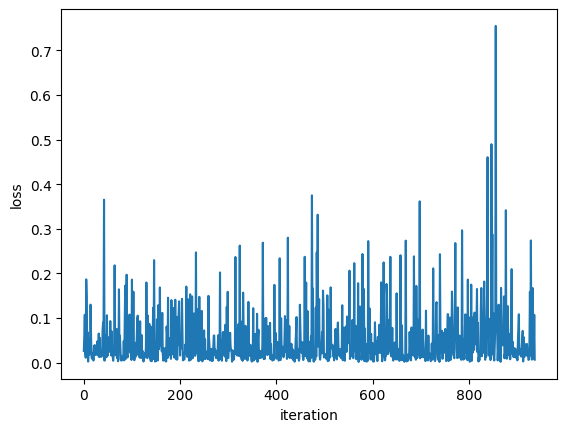

In [30]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


<h2 id="Question_3">Question 3:Find the misclassified samples</h2> 


<b>Identify the first four misclassified samples using the validation data:</b>


In [31]:
# Validation phase
misclassified_samples = []  # List to store misclassified samples
correct = 0
resnet18.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for validation
    for idx, (x_test, y_test) in enumerate(val_loader):
        # Move validation input and target to the same device
        x_test, y_test = x_test.to(device), y_test.to(device)

        # Make predictions
        y_pred_test = resnet18(x_test)

        # Find the predicted class
        _, yhat = torch.max(y_pred_test, 1)

        # Check for misclassified samples
        misclassified = (yhat != y_test)
        misclassified_samples.extend([(idx, x_test[i], y_test[i], yhat[i]) for i in range(len(misclassified)) if misclassified[i]])

        # Calculate correctly classified samples
        correct += (yhat == y_test).sum().item()

# Print first 4 misclassified samples (index, input image, true label, predicted label)
print(f"First 4 Misclassified Samples:")
for i, sample in enumerate(misclassified_samples[:4]):
    idx, image, true_label, pred_label = sample
    print(f"Sample {i + 1}:")
    print(f"Index: {idx}, True Label: {true_label.item()}, Predicted Label: {pred_label.item()}")


First 4 Misclassified Samples:
Sample 1:
Index: 2, True Label: 0, Predicted Label: 1
Sample 2:
Index: 4, True Label: 0, Predicted Label: 1
Sample 3:
Index: 7, True Label: 0, Predicted Label: 1
Sample 4:
Index: 8, True Label: 0, Predicted Label: 1


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01&utm_medium=Exinfluencer&utm_term=10006555"> CLICK HERE </a> Click here to see how to share your notebook.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">MIT License</a>.
